# MOWNIT
## Lab 8
Jakub Karbowski

In [1]:
using Plots: plot, plot!
using Base.Iterators: countfrom, accumulate, takewhile, flatten

In [2]:
err(y, pnts) = maximum(@. abs(y(getindex(pnts, 1)) - getindex(pnts, 2)))

err (generic function with 1 method)

In [3]:
struct IVP{T, F}
    f::F
    t0::T
    y0::T
end

In [4]:
function rk1(ivp::IVP{T, F}, h::T) where {T, F}
    ts = countfrom(ivp.t0, h)
    ys = accumulate(ts, init=ivp.y0) do y, t
        y + h * ivp.f(t, y)
    end
    zip(ts, flatten([[ivp.y0], ys]))
end

rk1 (generic function with 1 method)

In [5]:
function rk2(ivp::IVP{T, F}, h::T) where {T, F}
    ts = countfrom(ivp.t0, h)
    ys = accumulate(ts, init=ivp.y0) do y, t
        y + h * ivp.f(t + h/2, y + h/2 * ivp.f(t, y))
    end
    zip(ts, flatten([[ivp.y0], ys]))
end

rk2 (generic function with 1 method)

In [6]:
function rk4(ivp::IVP{T, F}, h::T) where {T, F}
    ts = countfrom(ivp.t0, h)
    ys = accumulate(ts, init=ivp.y0) do y, t
        k1 = ivp.f(t, y)
        k2 = ivp.f(t + h/2, y + h*k1/2)
        k3 = ivp.f(t + h/2, y + h*k2/2)
        k4 = ivp.f(t + h, y + h*k3)
        y + h/6 * (k1 + 2k2 + 2k3 + k4)
    end
    zip(ts, flatten([[ivp.y0], ys]))
end

rk4 (generic function with 1 method)

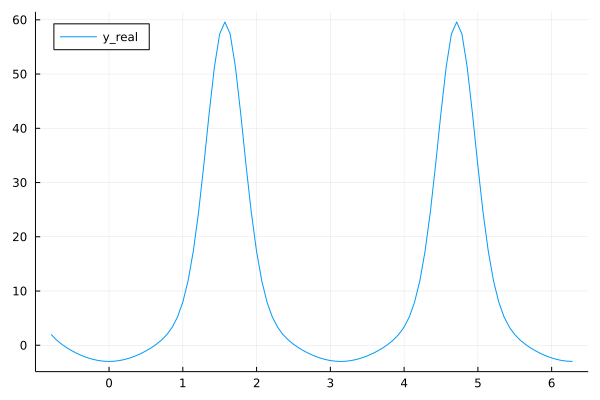

In [7]:
k = 4.
m = 2.

y_real(x) = exp(-k*cos(m*x)) - k*cos(m*x) + 1

x0 = -pi/4
xk = 2pi

a = y_real(x0)

ivp = IVP(
    (x, y) -> k*m*y*sin(m*x) + k*k*m*sin(m*x)*cos(m*x),
    x0,
    a,
)

plot(
    [(x, y_real(x)) for x = range(x0, xk, length=100)],
    label="y_real",
    legend=:topleft,
)

In [8]:
results = Dict()

function solve(h)
    plot(
        [(x, y_real(x)) for x = range(x0, xk, length=100)],
        label="y_real",
        legend=:topleft,
        line=:dash,
        title="h = $h",
        fmt=:png,
    )
    for method = (rk1, rk2, rk4)
        pnts = takewhile(p -> p[1] <= xk, method(ivp, h)) |> collect
        e = err(y_real, pnts)
        results["$method $h"] = e
        println("$method err = $e")
        plot!(pnts, label="$method")
    end
    plot!()
end

solve (generic function with 1 method)

rk1 err = 284.23245374930735
rk2 err = 87.39036415292765
rk4 err = 1.0358459586221542


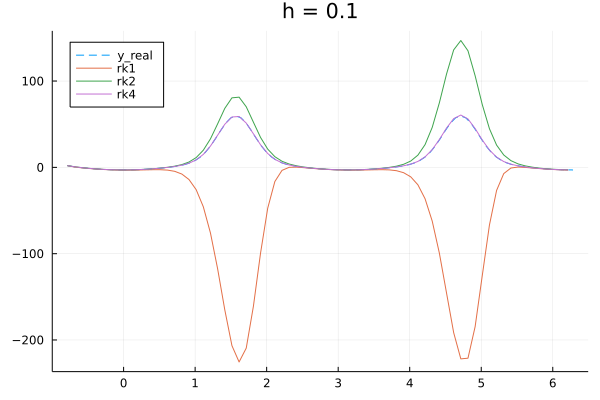

In [9]:
solve(0.1)

rk1 err = 201.749973323993
rk2 err = 0.06762635792508576
rk4 err = 3.316275850551165e-5


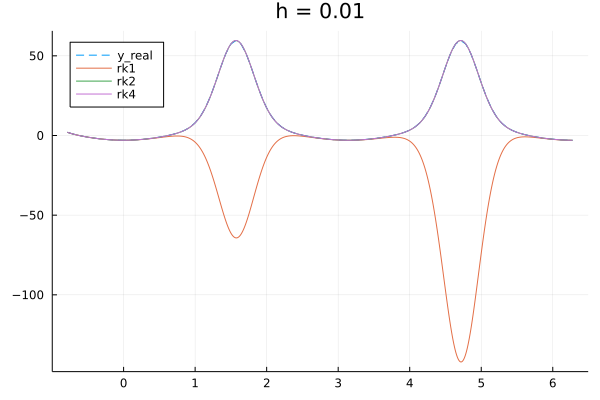

In [10]:
solve(0.01)

rk1 err = 30.291519834100512
rk2 err = 0.0010089866537654757
rk4 err = 3.84457621294132e-9


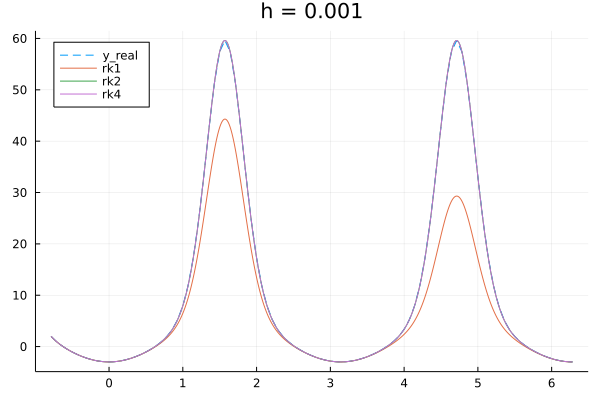

In [11]:
solve(0.001)

rk1 err = 3.1663539425833562
rk2 err = 1.0423858682884202e-5
rk4 err = 8.138059115481155e-10


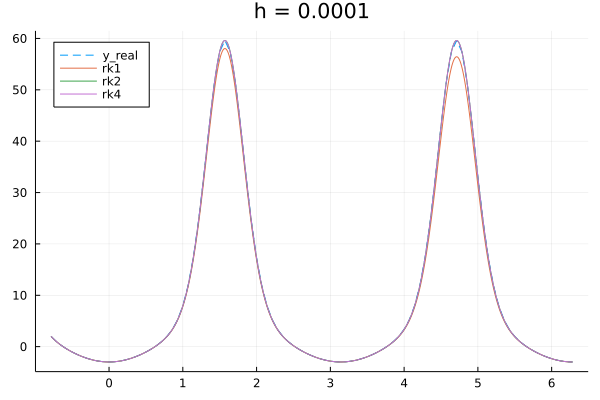

In [12]:
solve(0.0001)

rk1 err = 0.3180531254799277
rk2 err = 1.0483760348733995e-7
rk4 err = 9.313218640727428e-9


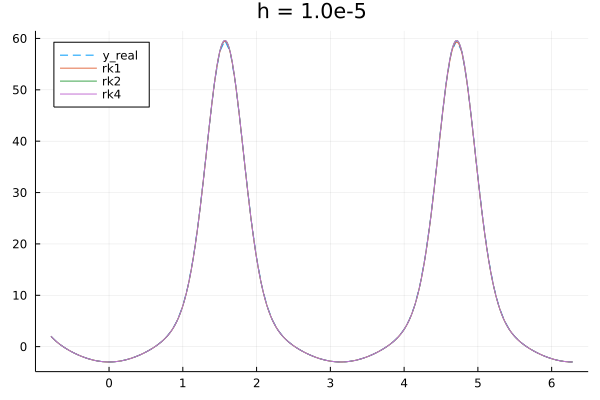

In [13]:
solve(0.00001)

In [14]:
results

Dict{Any, Any} with 15 entries:
  "rk2 0.01"   => 0.0676264
  "rk2 0.1"    => 87.3904
  "rk4 0.01"   => 3.31628e-5
  "rk1 0.001"  => 30.2915
  "rk1 0.0001" => 3.16635
  "rk4 0.0001" => 8.13806e-10
  "rk2 1.0e-5" => 1.04838e-7
  "rk1 0.01"   => 201.75
  "rk1 1.0e-5" => 0.318053
  "rk4 0.1"    => 1.03585
  "rk4 1.0e-5" => 9.31322e-9
  "rk4 0.001"  => 3.84458e-9
  "rk2 0.001"  => 0.00100899
  "rk2 0.0001" => 1.04239e-5
  "rk1 0.1"    => 284.232